In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange
import pickle

from flygym.envs.nmf_mujoco import MuJoCoParameters
from flygym.arena.mujoco_arena import FlatTerrain
import flygym.util.vision as vision
from odor_vision import ObstacleOdorArena, NMFObservation


In [2]:
sim_params = MuJoCoParameters(render_playspeed=0.2, render_camera="Animat/camera_top_zoomout", render_raw_vision=True, enable_olfaction=True)

save_path = "../../data"
num_pos = 20
steps = 1

In [3]:
a = ObstacleOdorArena()

print(a.get_walls_distance(np.array([12,-5,0.5]), np.array([np.pi, 0, 0])))

print(a.get_walls_distance(np.array([0,0,0.5]), np.array([np.pi/2, 0, 0])))

[-2.204364238465236e-15, 12.0, True]
[0, 0, False]


In [1]:
import datetime
print(
    '{date:%d-%m_%H:%M}'.format( date=datetime.datetime.now() )
    )

10-08_10:57


In [4]:
dataset = []

for f in trange(num_pos):
    arena = ObstacleOdorArena()
    spawn_pos = (np.random.randint(-1,25),np.random.randint(-12,12),0.5)
    spawn_orient = (0,0,1,np.random.random()*2*np.pi)
    sim = NMFObservation(
        sim_params=sim_params,
        arena=arena,
        obj_threshold=50,
        spawn_pos=spawn_pos,
        spawn_orient=spawn_orient,
        pos_range=[[-1,25], [-12,12]]
    )

    for i in range(steps):
        obs,_,_,_,_ = sim.step([0,0])
        dataset.append(obs)

    sim.close()

100%|██████████| 20/20 [01:40<00:00,  5.01s/it]


In [5]:
dataset = np.array(dataset)
with open(save_path+"/dataset_test.pkl", "wb") as f:
    pickle.dump(dataset, f)

In [8]:
with open(save_path+"/dataset_test.pkl", "rb") as f:
    data = pickle.load(f)

print(data.shape)

(20, 1445)


[-0.22393152  0.80901877  1.        ]


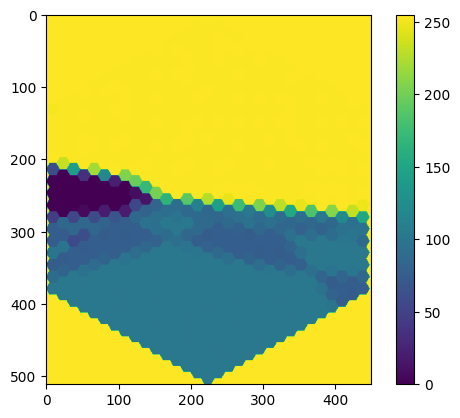

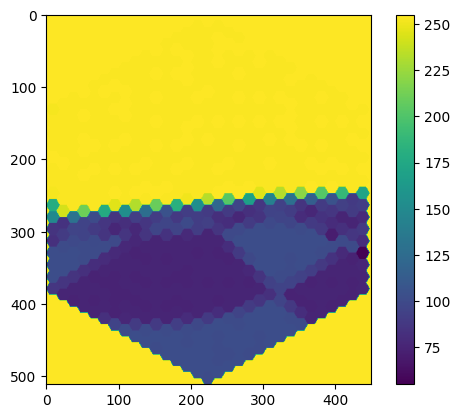

[-0.12312565  1.10653419  1.        ]


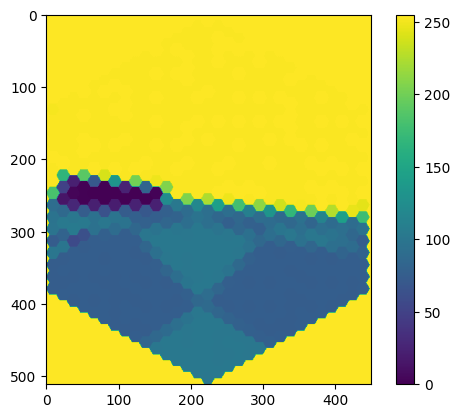

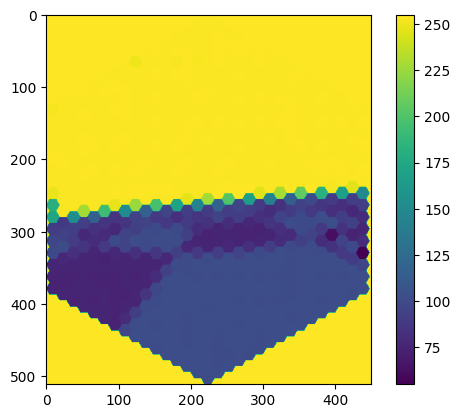

[0.77299546 0.63975668 1.        ]


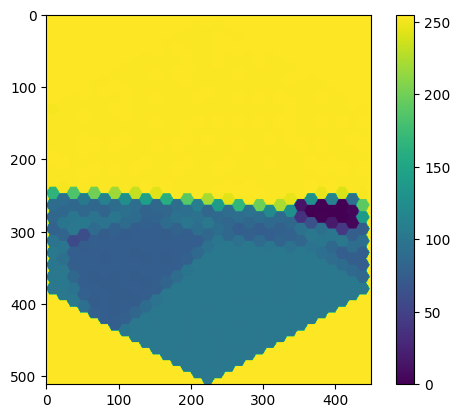

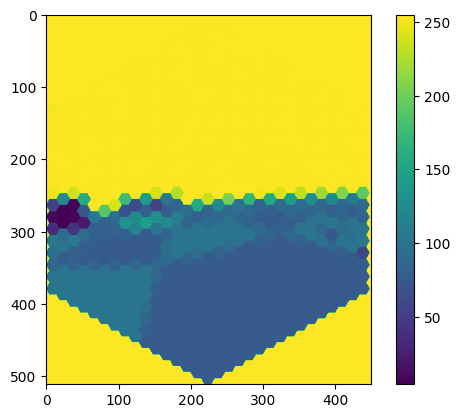

[0.02627769 0.32907122 1.        ]


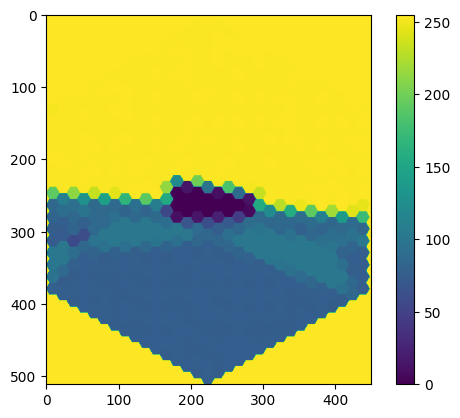

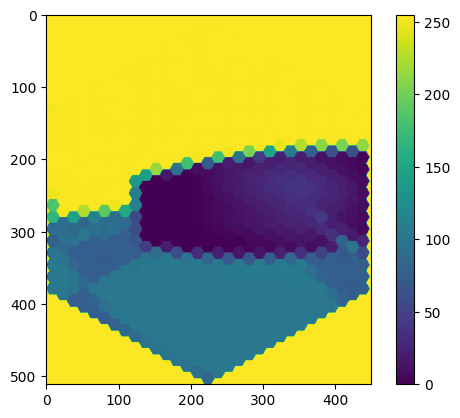

[0.18173353 0.64424175 1.        ]


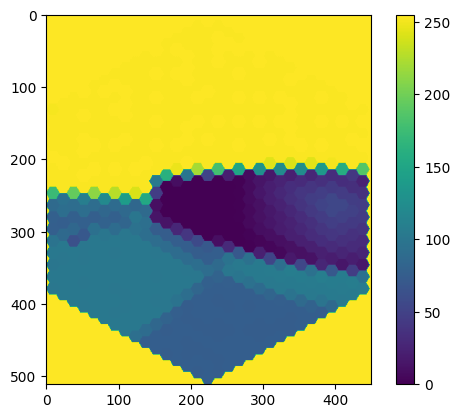

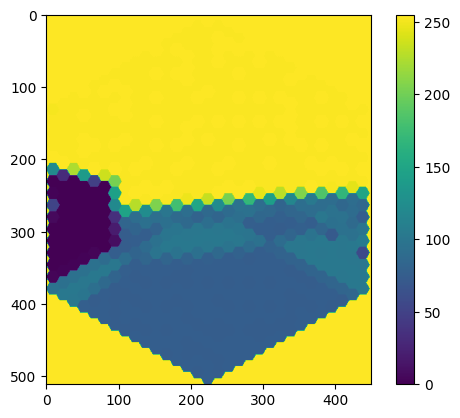

[0.16646098 1.13609732 1.        ]


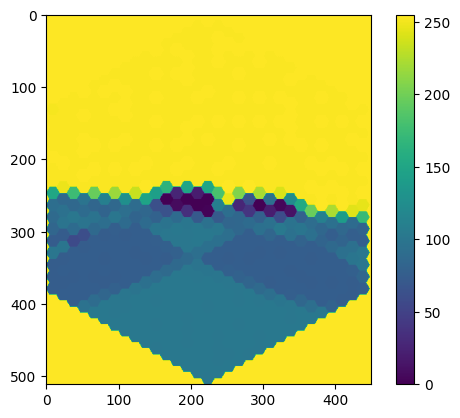

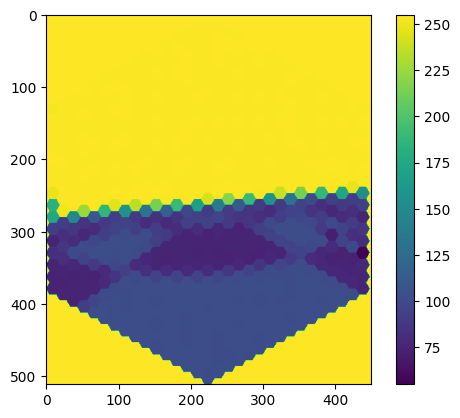

[0. 0. 0.]


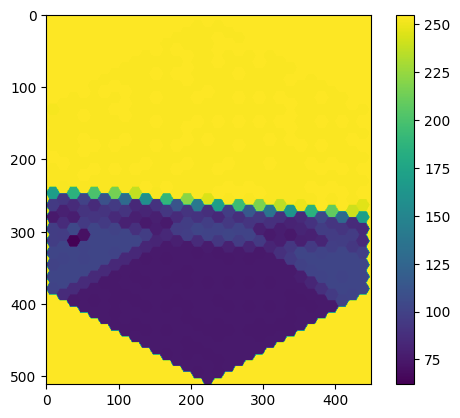

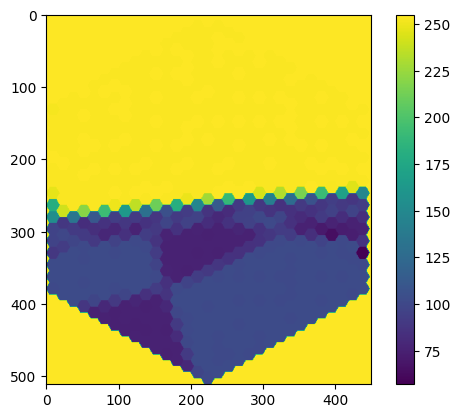

[-0.12946578  0.08757425  1.        ]


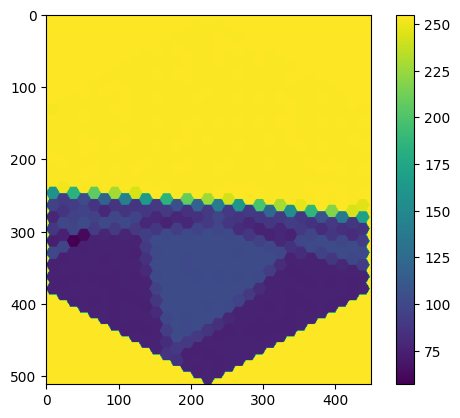

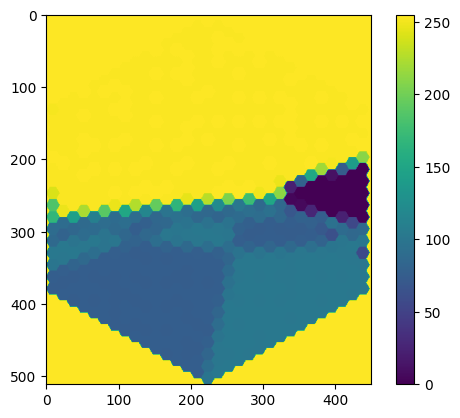

[0.55655307 0.17294837 1.        ]


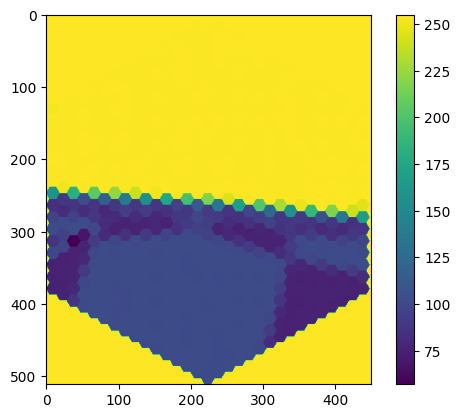

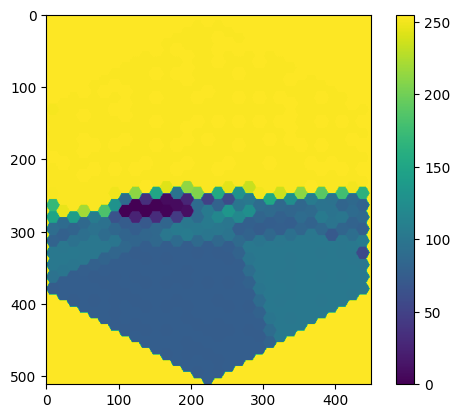

[0.54361037 0.39219362 1.        ]


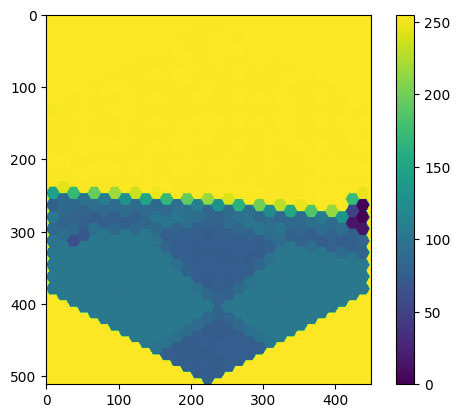

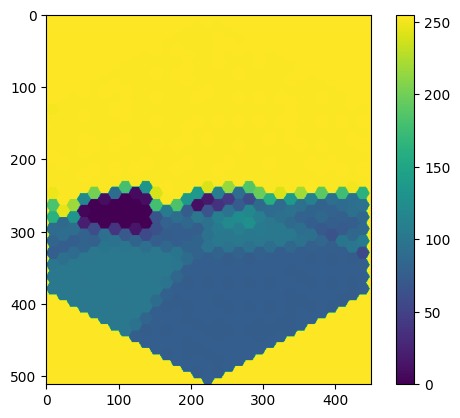

[0.07592928 0.50555667 1.        ]


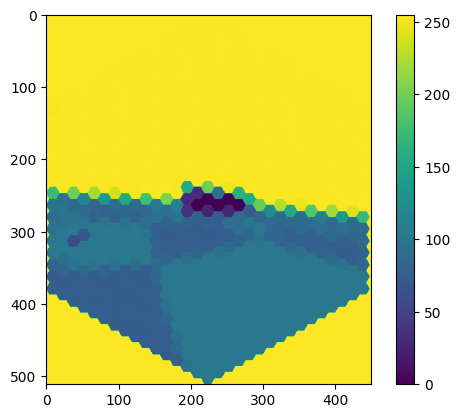

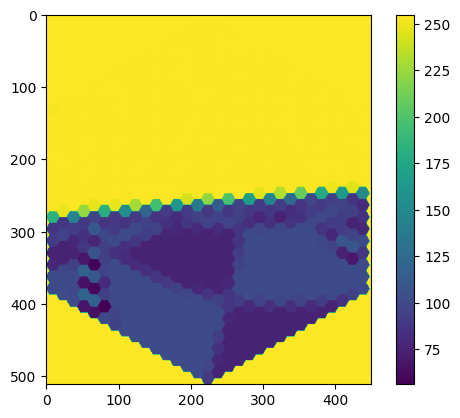

[0. 0. 0.]


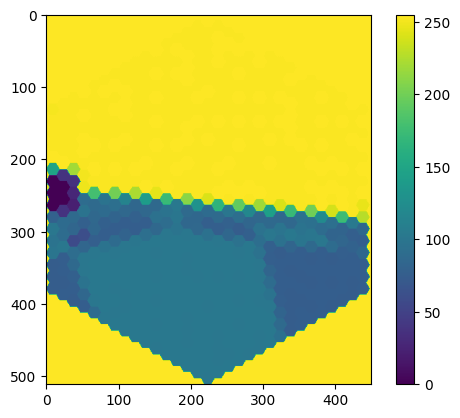

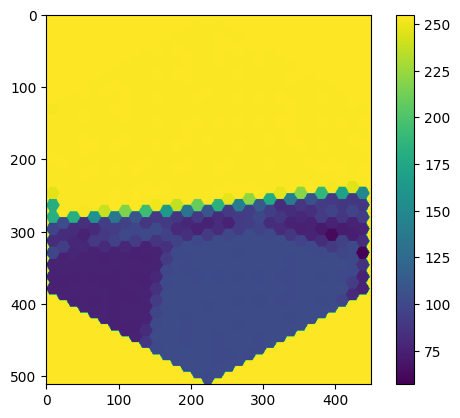

[0.07837144 0.03672296 1.        ]


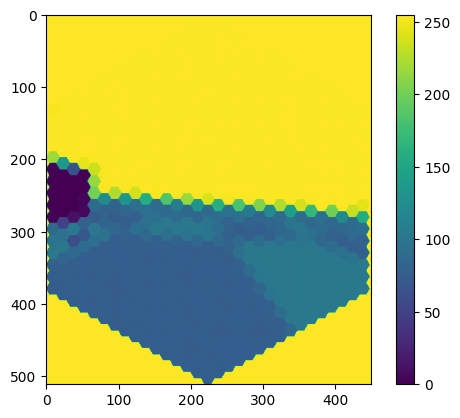

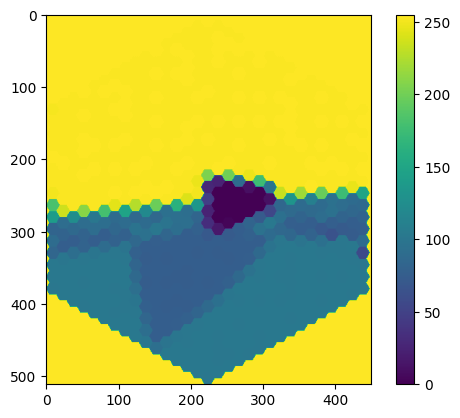

[-0.17258798  0.89836379  1.        ]


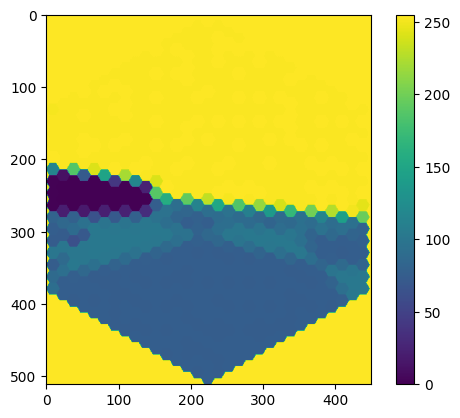

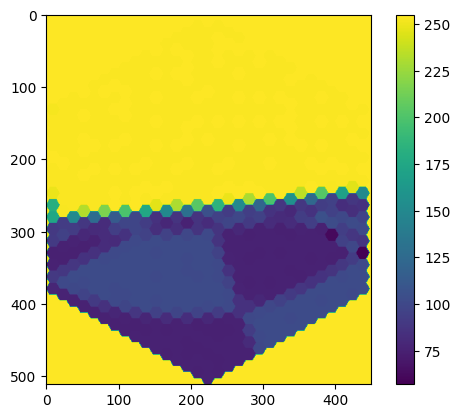

[0.19469344 0.52195732 1.        ]


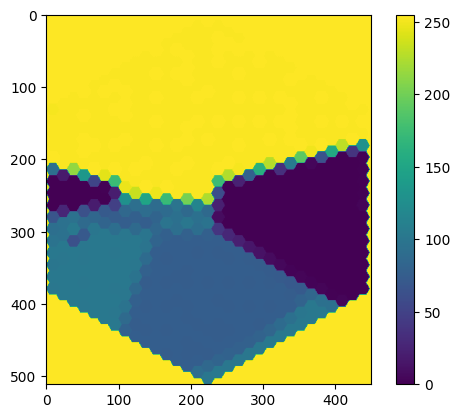

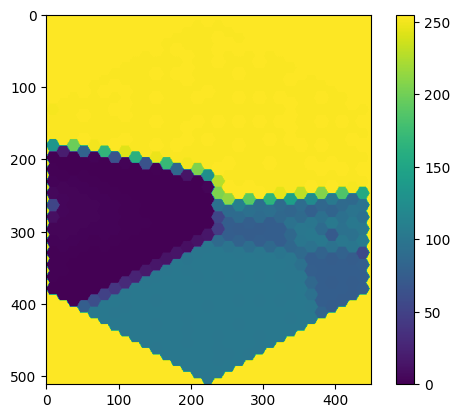

[0.37464452 0.17743433 1.        ]


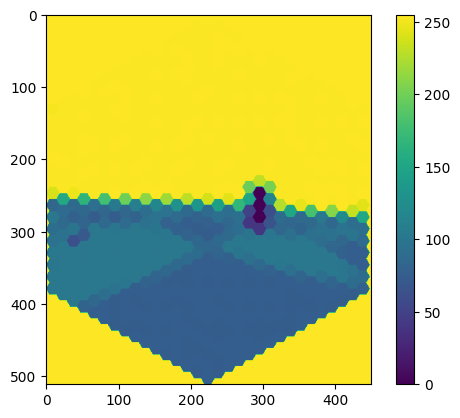

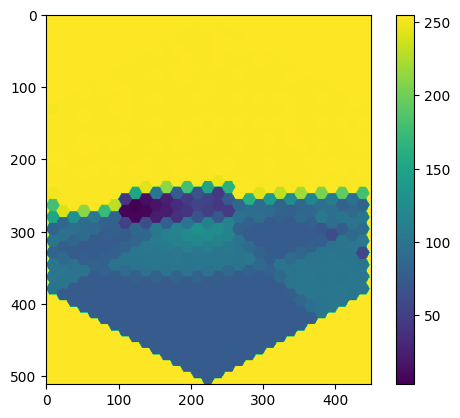

[0.28836683 1.200657   1.        ]


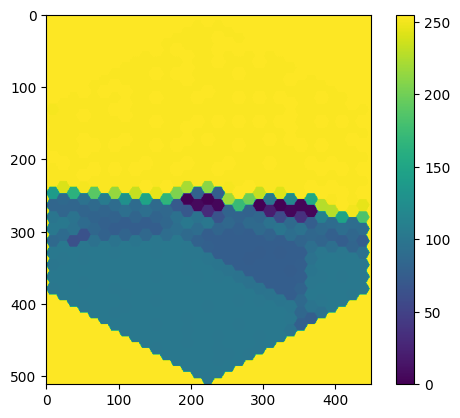

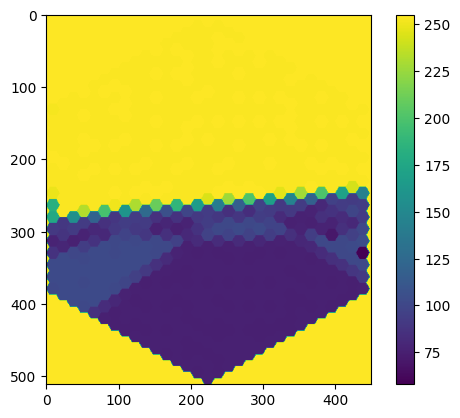

[0.10007839 0.34265296 1.        ]


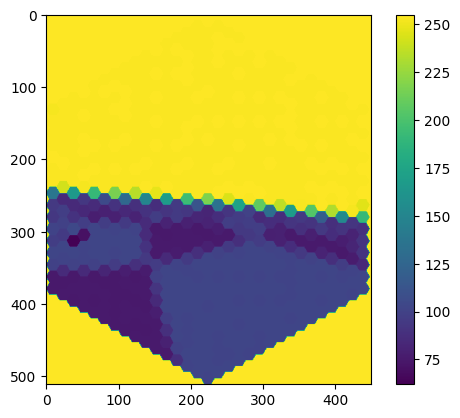

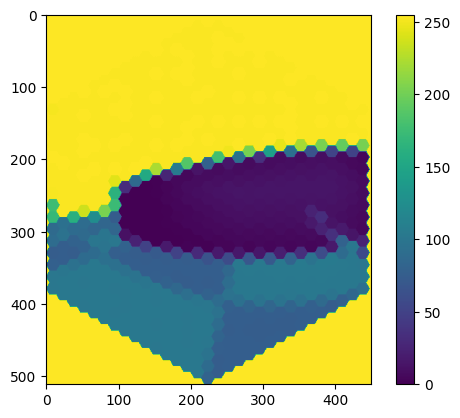

[0.02353469 0.46130624 1.        ]


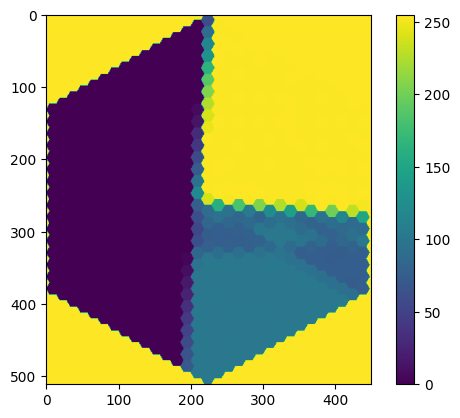

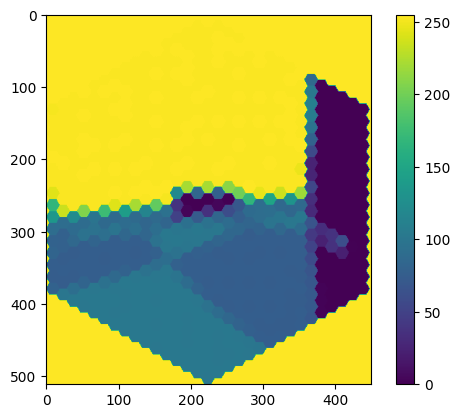

[0.21986698 0.39435023 1.        ]


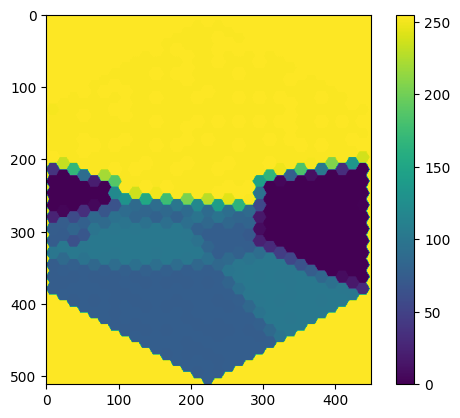

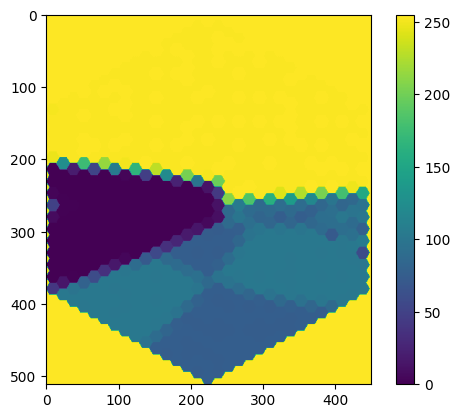

In [7]:
for sample in data:
    vis = sample[:-3]
    features = sample[-3:]
    print(features)

    vis_input = np.array(vis)
    vis_input = np.reshape(vis_input, (2,-1))
    vis_input = np.stack((255*vis_input, np.zeros_like(vis_input)), axis=2)
    hr = vision.hex_pxls_to_human_readable(vis_input[0,:,:], vision.ommatidia_id_map)
    plt.imshow(hr)
    plt.colorbar()
    plt.show()
    hr = vision.hex_pxls_to_human_readable(vis_input[1,:,:], vision.ommatidia_id_map)
    plt.imshow(hr)
    plt.colorbar()
    plt.show()
    